#### simulating drag

$$\ddot{x} = -\frac{c}{m}v\dot{x}$$
$$\ddot{y} = -g - \frac{c}{m}v\dot{y}$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_trajectory(v0, theta, c=0.1, m=1.0, dt=0.01, total_time=10):
    # Convert angle to radians
    theta_rad = np.radians(theta)
    
    # Initial conditions
    x = 0.0
    y = 0.0
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)
    
    # Constants
    g = 9.81  # gravity
    
    # Arrays to store the trajectory points
    x_vals = [x]
    y_vals = [y]
    t_vals = [0]
    
    for t in np.arange(dt, total_time, dt):
        # Calculate the speed
        v = np.sqrt(vx**2 + vy**2)
        
        # Update velocities
        ax = -c/m * v * vx
        ay = -g - c/m * v * vy
        vx += ax * dt
        vy += ay * dt
        
        # Update positions
        x += vx * dt
        y += vy * dt
        
        # Store the results
        x_vals.append(x)
        y_vals.append(y)
        t_vals.append(t)
        
        # Stop if the projectile hits the ground
        if y < 0:
            break
    
    return np.array(x_vals), np.array(y_vals), np.array(t_vals)


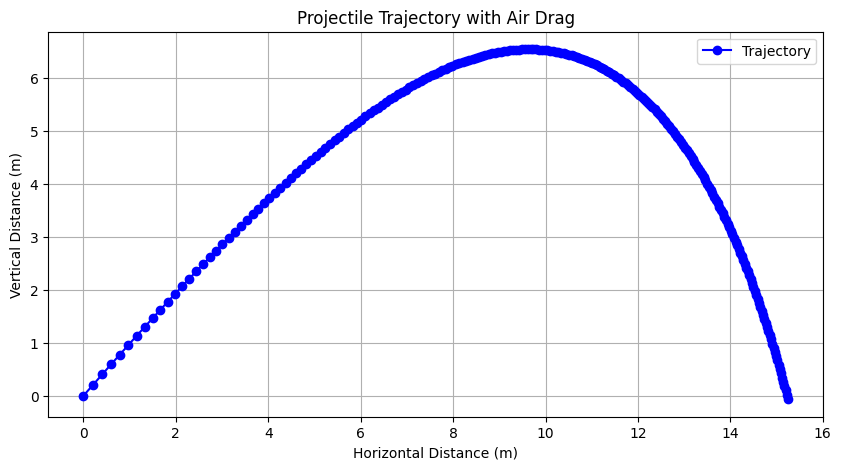

In [6]:

def plot_trajectory(x_vals, y_vals):
    plt.figure(figsize=(10, 5))
    plt.plot(x_vals, y_vals, label='Trajectory', color='b', marker='o', linestyle='-')
    plt.title('Projectile Trajectory with Air Drag')
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Vertical Distance (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
v0 = 30  # initial velocity in m/s
theta = 45  # angle in degrees
x_vals, y_vals, t_vals = simulate_trajectory(v0, theta)
plot_trajectory(x_vals, y_vals)
